<a href="https://colab.research.google.com/github/Waleed-ikh72/Weeky_Project_5/blob/main/Waleed_Al_Ikhwan_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

In [310]:
import pandas as pd

df = pd.read_csv("Traffic Data.csv",parse_dates=['date_time']) # import dataset and parsed datetime
df.head() # display the first few rows

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [311]:
df['date_time']# The data needs to be sorted.

,date_time
0,2017-08-27 01:00:00
1,2018-09-06 23:00:00
2,2017-08-25 18:00:00
3,2017-11-09 22:00:00
4,2017-11-09 15:00:00
...,...
19995,2018-06-06 21:00:00
19996,2017-10-25 15:00:00
19997,2018-03-28 23:00:00
19998,2018-02-12 15:00:00


In [312]:
df.shape

(20000, 8)

In [313]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [314]:
df.dropna(inplace=True)

In [315]:
df = df.sort_values(by='date_time')
time_series = df.set_index('date_time')

In [316]:
time_series.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [317]:
time_series.dropna(inplace=True)

In [318]:
time_series.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [319]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19980 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 19980 non-null  float64
 2   rain_1h              19980 non-null  float64
 3   snow_1h              19980 non-null  float64
 4   clouds_all           19980 non-null  int64  
 5   weather_main         19980 non-null  object 
 6   weather_description  19980 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


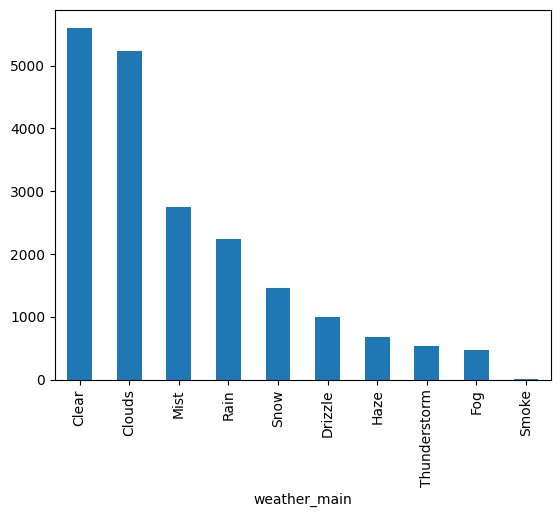

In [320]:
time_series['weather_main'].value_counts().plot(kind='bar');

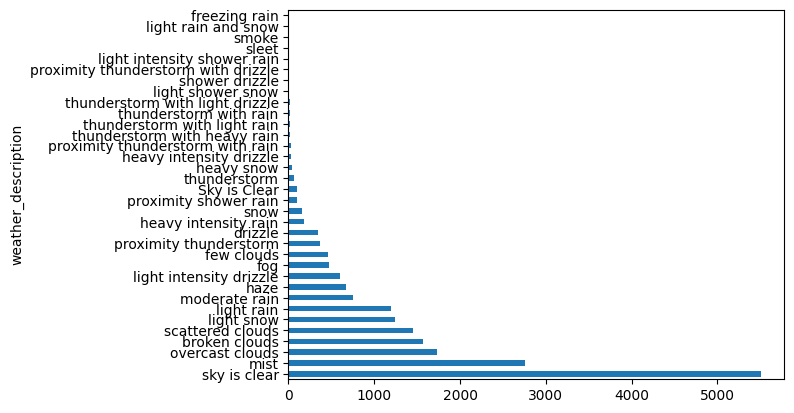

In [321]:
time_series['weather_description'].value_counts().plot(kind='barh');

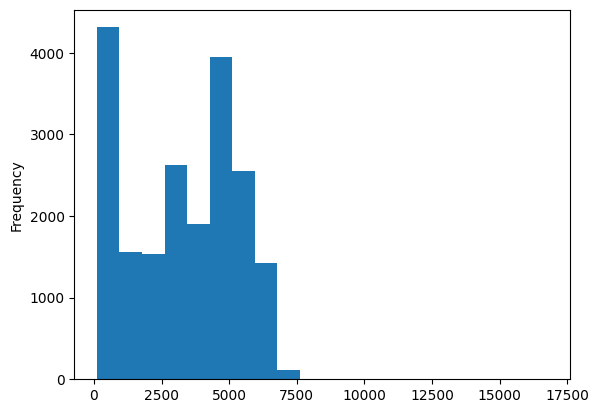

In [322]:
time_series['traffic_volume'].plot(kind='hist',bins=20);

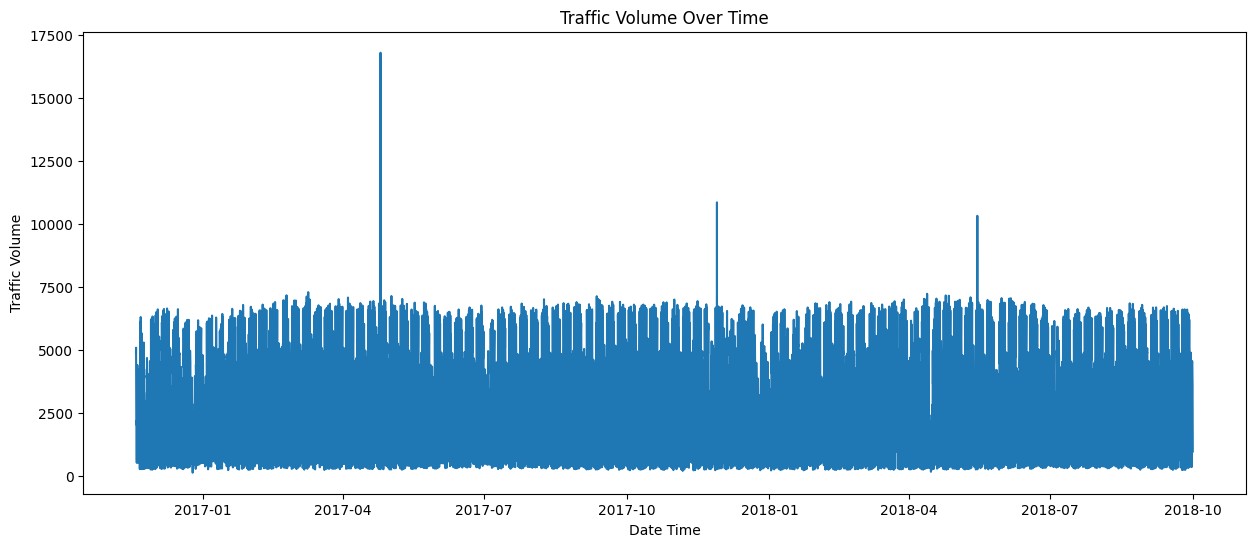

In [323]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(time_series['traffic_volume'])
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.show()

<Axes: title={'center': 'Traffic Volume in January 2017'}, xlabel='date_time'>

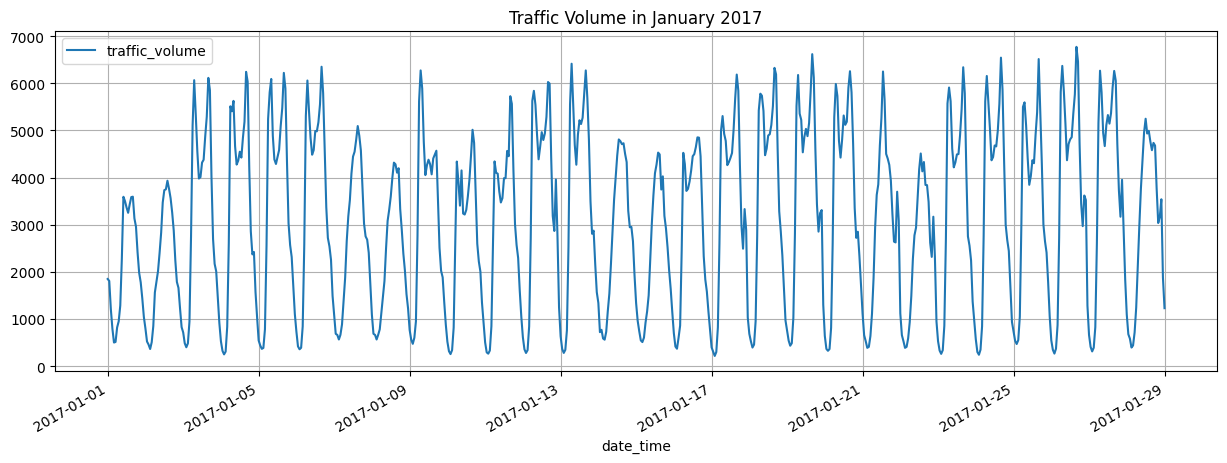

In [324]:
time_series[['traffic_volume']].loc['2017-01-01 00:00':'2017-01-29 00:00'].plot(figsize=(15, 5),
                                                                                grid=True,
                                                                                title = 'Traffic Volume in January 2017')

# this is a time series of traffic volume with picked a random year.
# as can be seen that it shows the the traffic volume of January of 2017.
# we can see that it goes up and down


In [325]:
# Boxplot

numerical_columns = time_series.select_dtypes(exclude=['object']).columns
numerical_columns # selecting the numerical columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all'], dtype='object')

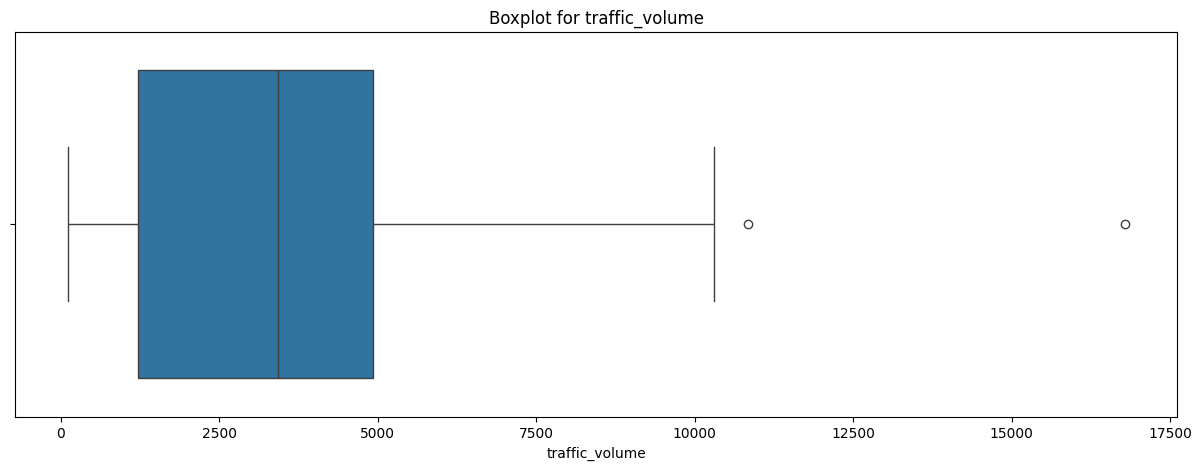

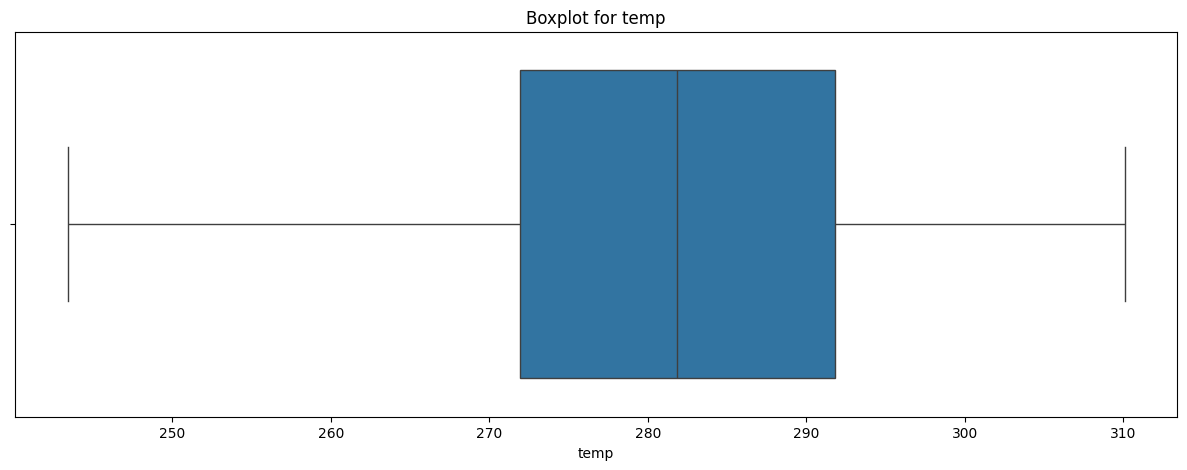

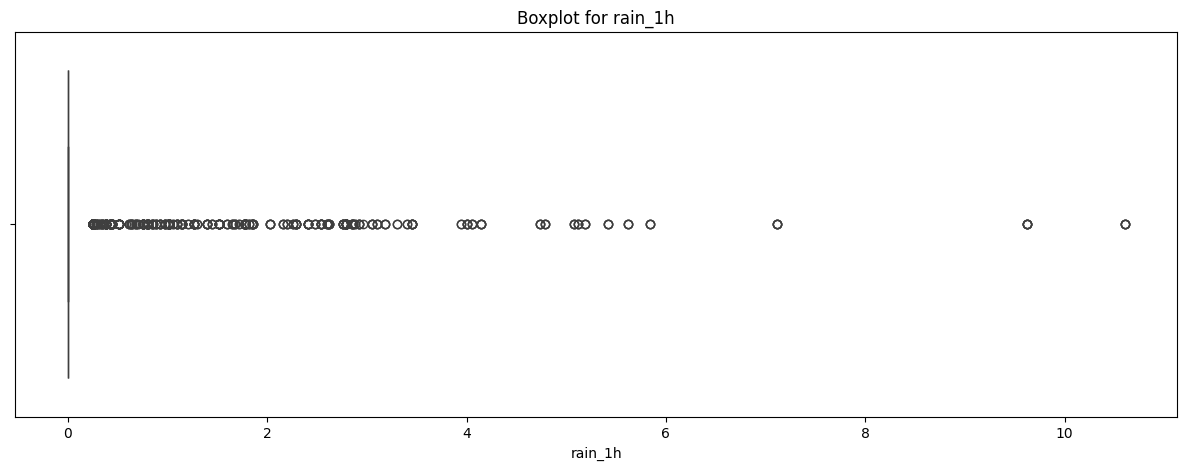

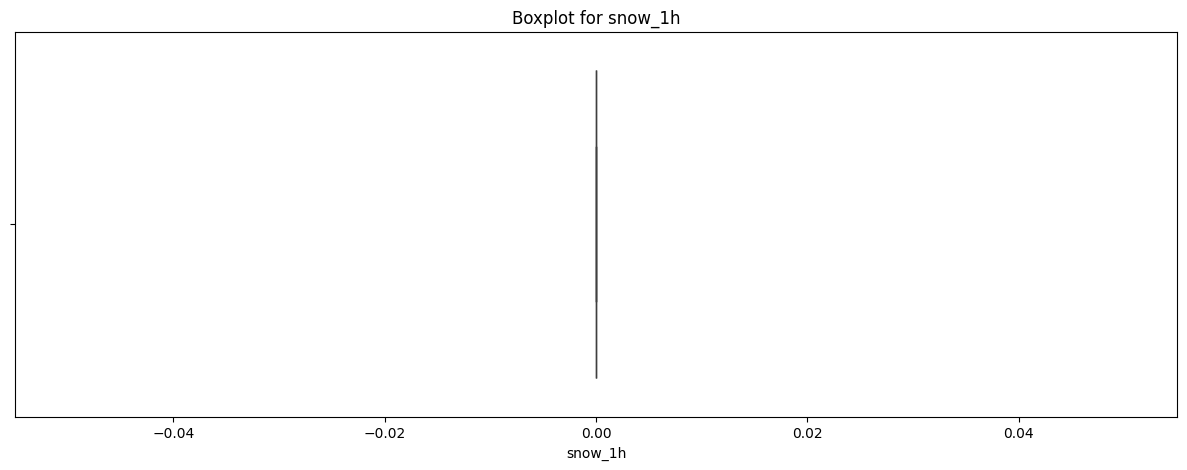

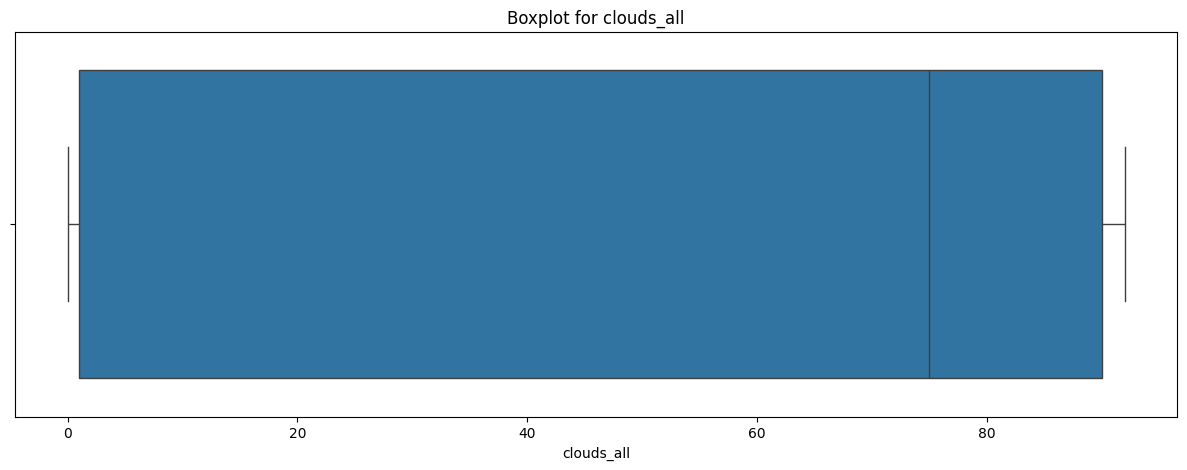

In [326]:
import seaborn as sns
for col in numerical_columns:
  plt.figure(figsize=(15,5)),
  plt.title(f'Boxplot for {col}')
  sns.boxplot(data = time_series,x=time_series[col])
  plt.show() # idenefying the outliers using the boxplot

In [327]:
# Handling outliers
def remove_outliers(time_series,column):
    q1 = time_series[column].quantile(0.30)
    q3 = time_series[column].quantile(0.70)
    iqr = q3 - q1
    lower_bound  = q1 - (1.5 * iqr)
    upper_bound  = q3 + (1.5 * iqr)
    return time_series.loc[(time_series[column] >= lower_bound) & (time_series[column] <= upper_bound)]

In [328]:
# removing outliers
for col in numerical_columns:
  time_series = remove_outliers(time_series,col)

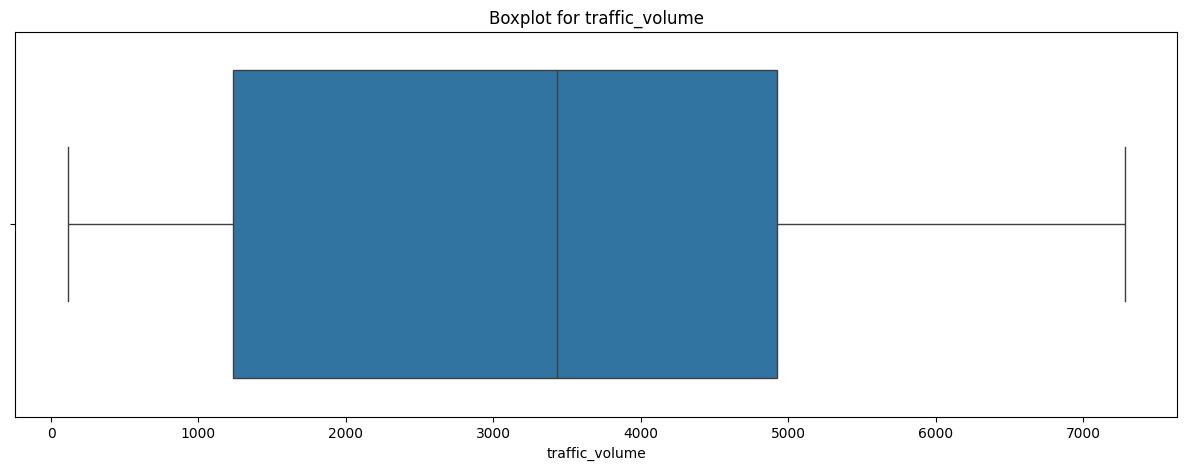

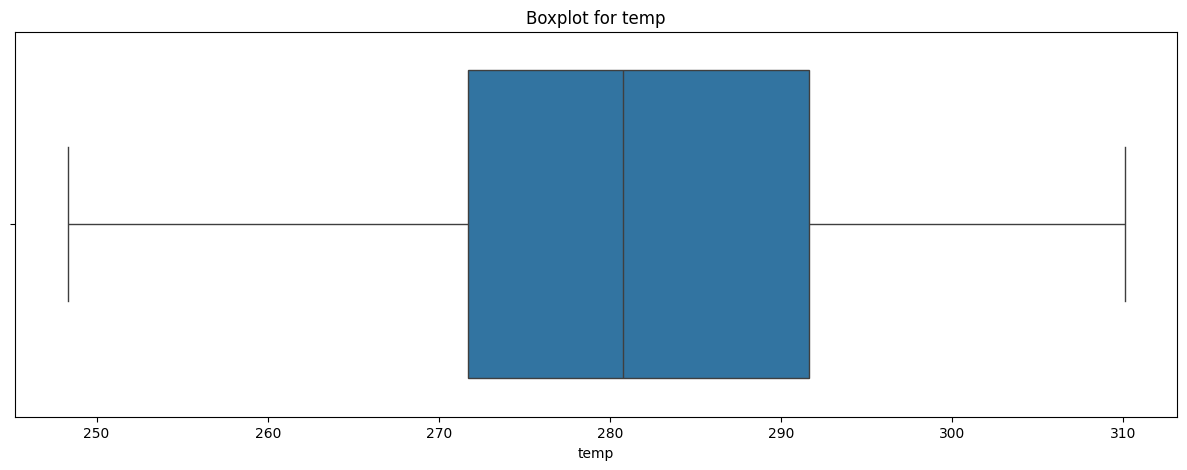

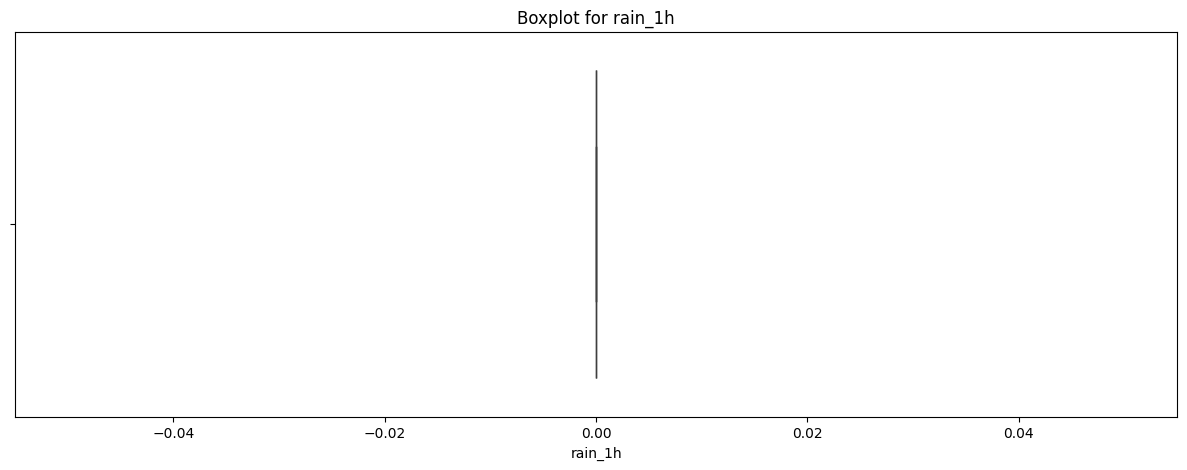

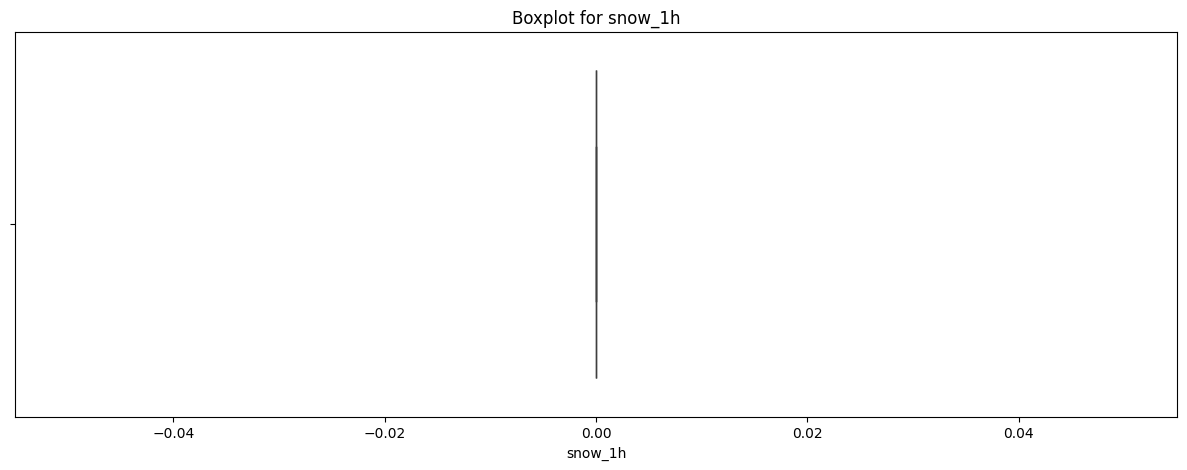

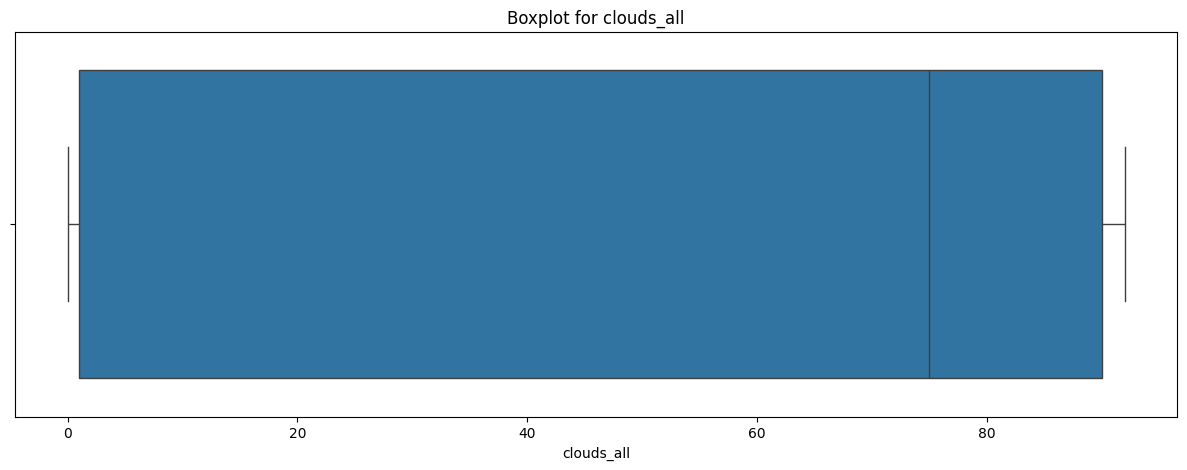

In [329]:
# Check again for outliers
for col in numerical_columns:
  plt.figure(figsize=(15,5)),
  plt.title(f'Boxplot for {col}')
  sns.boxplot(data = time_series,x=time_series[col])
  plt.show()

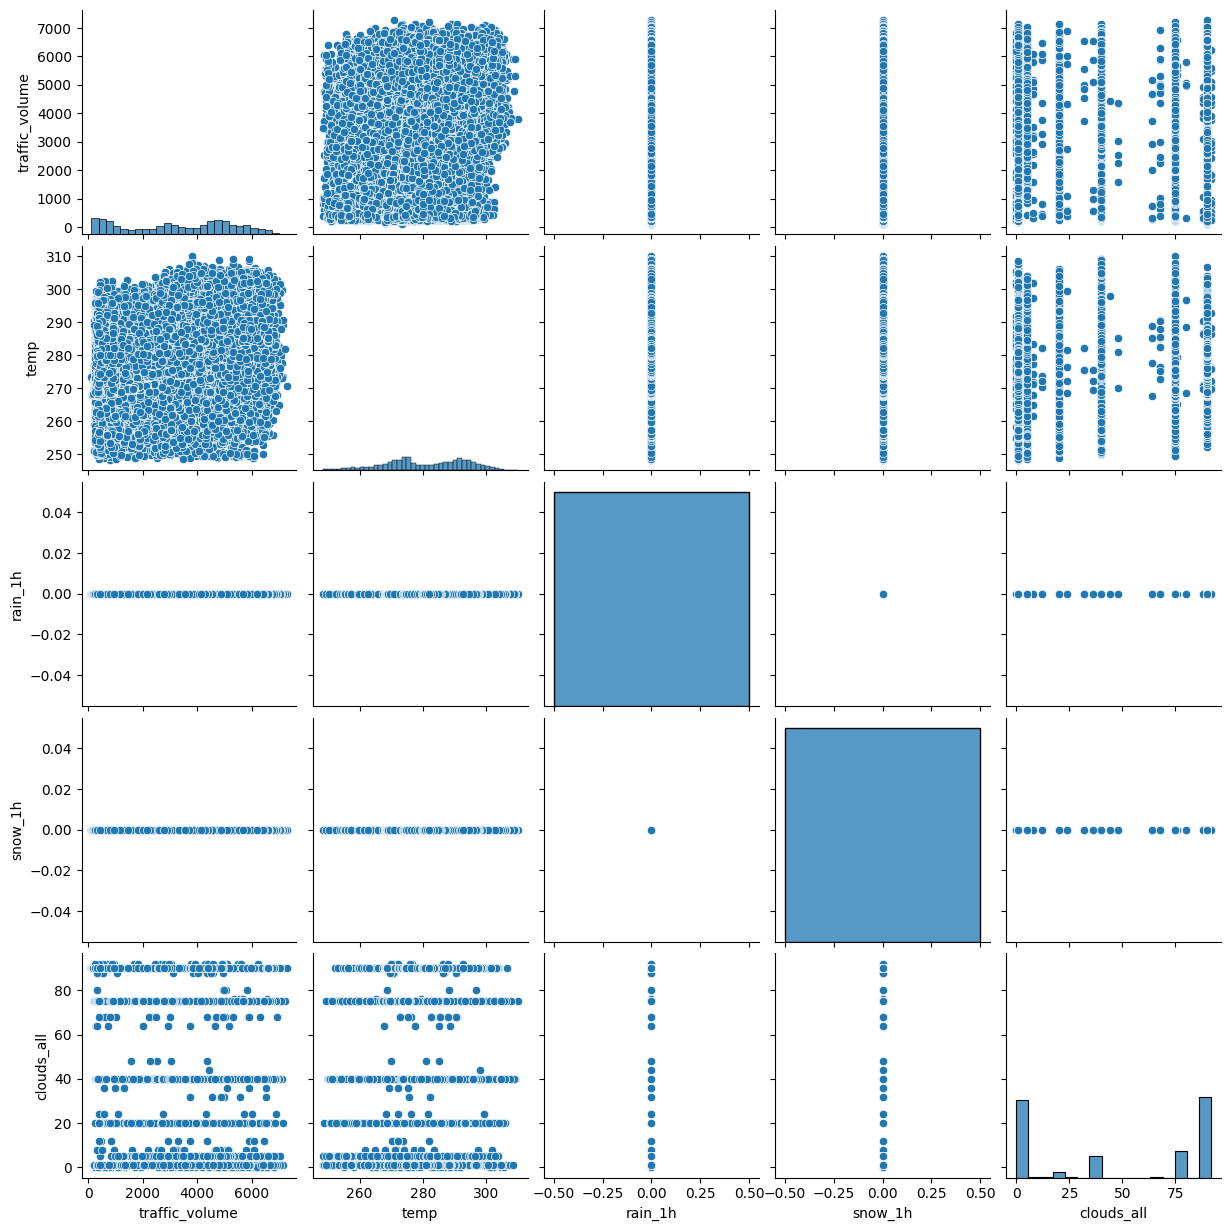

In [330]:
sns.pairplot(time_series); # pairplot enables each variable with other variable relationshops

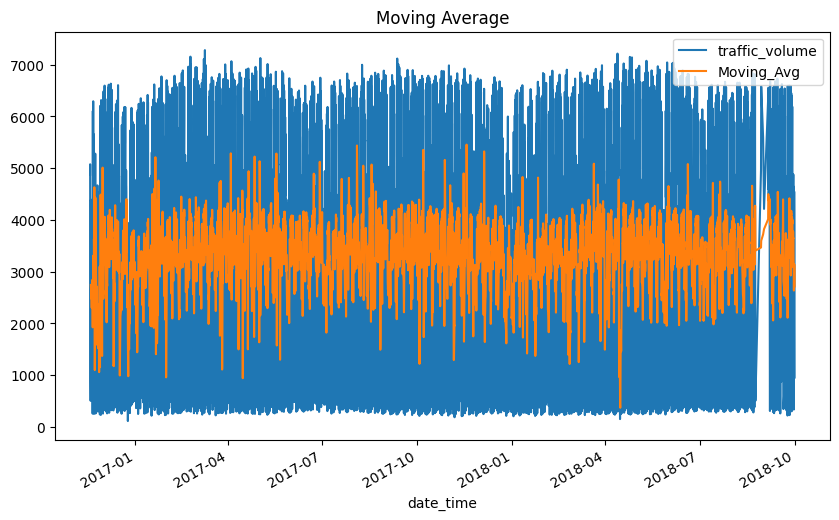

In [331]:
from statsmodels.tsa.seasonal import seasonal_decompose


time_series['Moving_Avg'] = time_series['traffic_volume'].rolling(window=30).mean()
time_series[['traffic_volume', 'Moving_Avg']].plot(figsize=(10, 6))
plt.title('Moving Average')
plt.show()

# this graph might be messy and hard to understand
# down below I resample for numerical features using the month indications and the plot looks understandable more


<Figure size 1200x800 with 0 Axes>

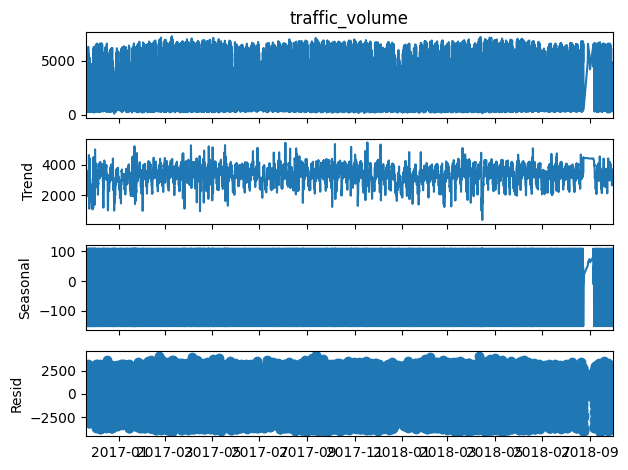

In [332]:
decomposition = seasonal_decompose(time_series['traffic_volume'], model='additive', period=30)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

In [334]:
df.duplicated().sum()

12

In [335]:
df.drop_duplicates(inplace=True)

In [337]:
df.duplicated().sum()

0

In [338]:
time_series.duplicated().sum()

0

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [339]:
# We handled the missing values above. Traffic volumn was the only columns has missing valeus of 20
# We dropped them as they are very low of overall data.

In [340]:
time_series_numeric = time_series.select_dtypes(include=['number'])

# Resample only the numeric columns
time_series_resampled = time_series_numeric.resample('M').mean()

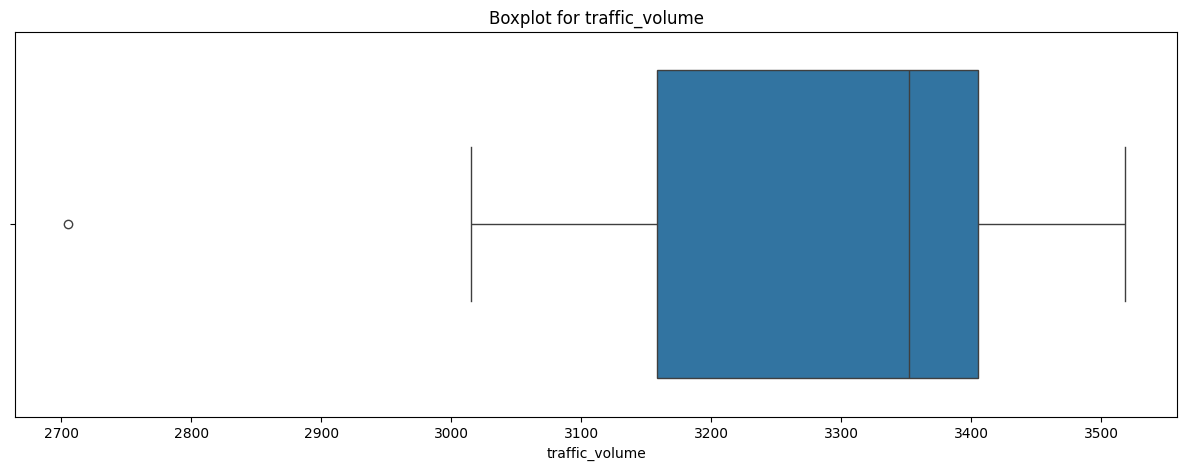

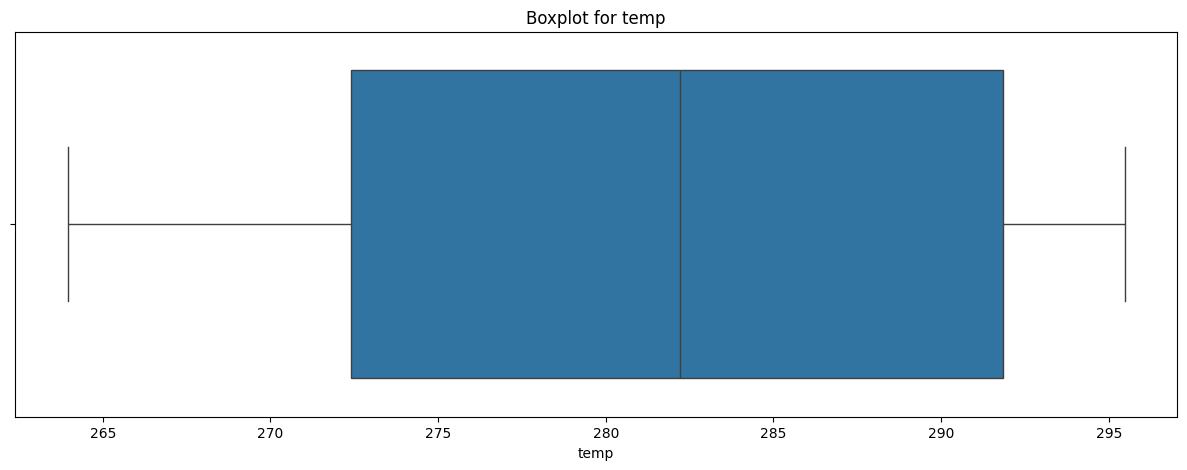

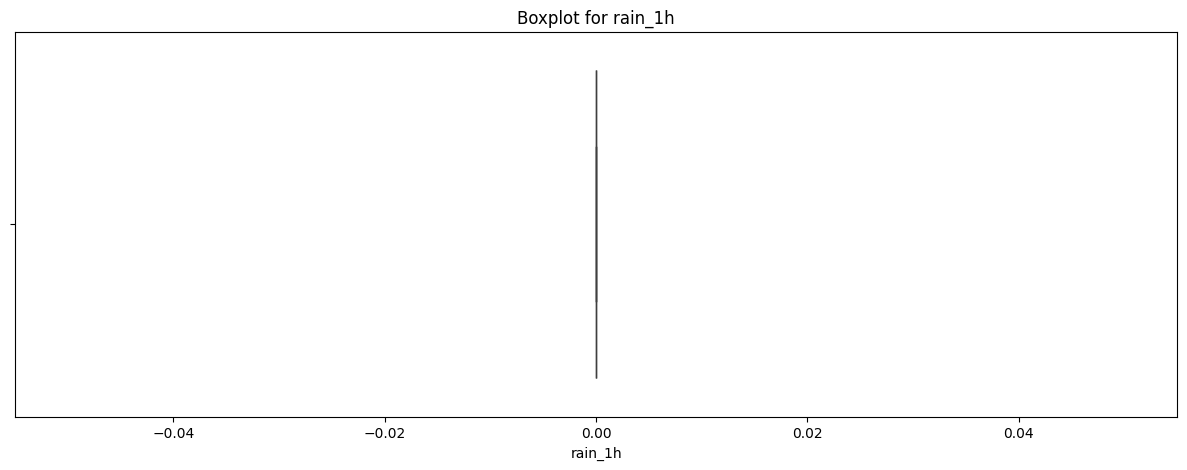

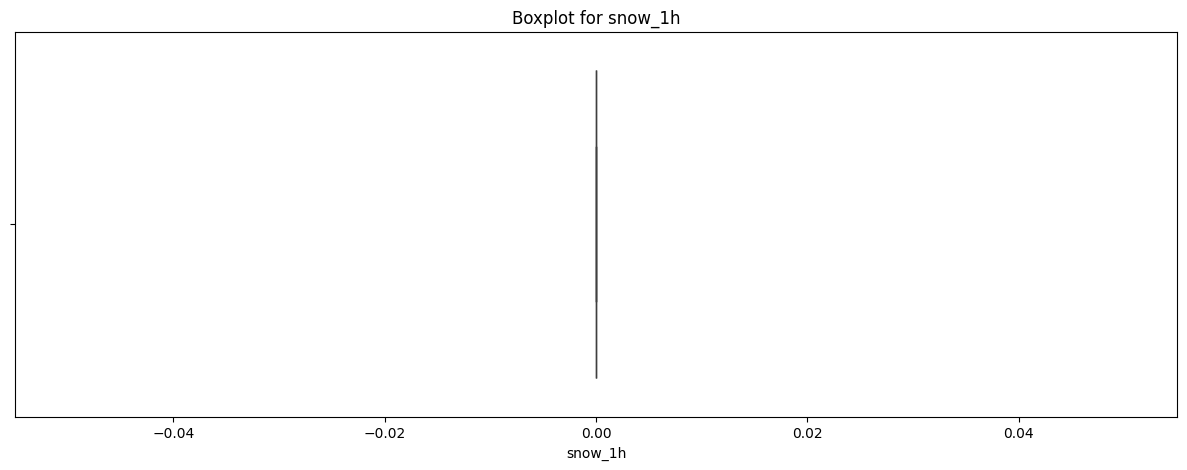

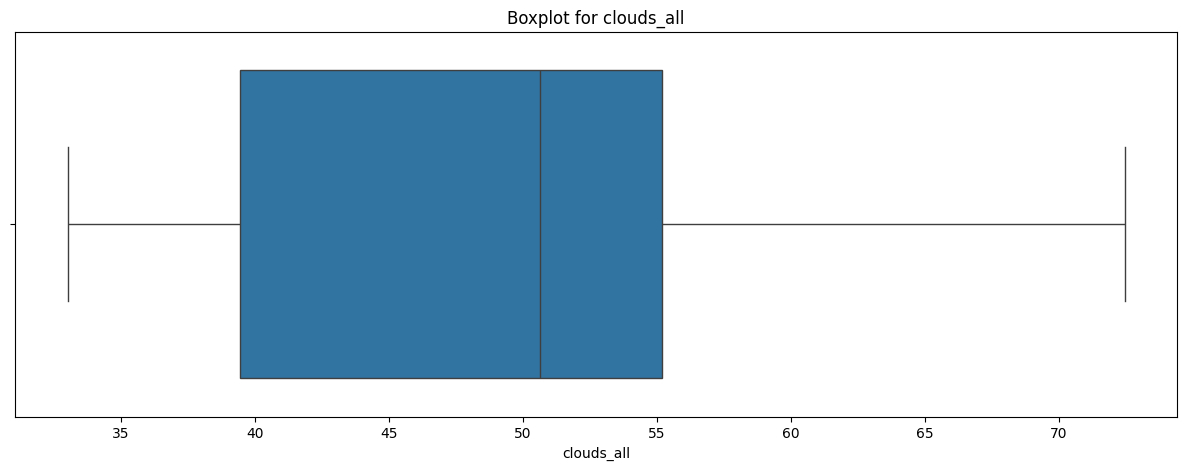

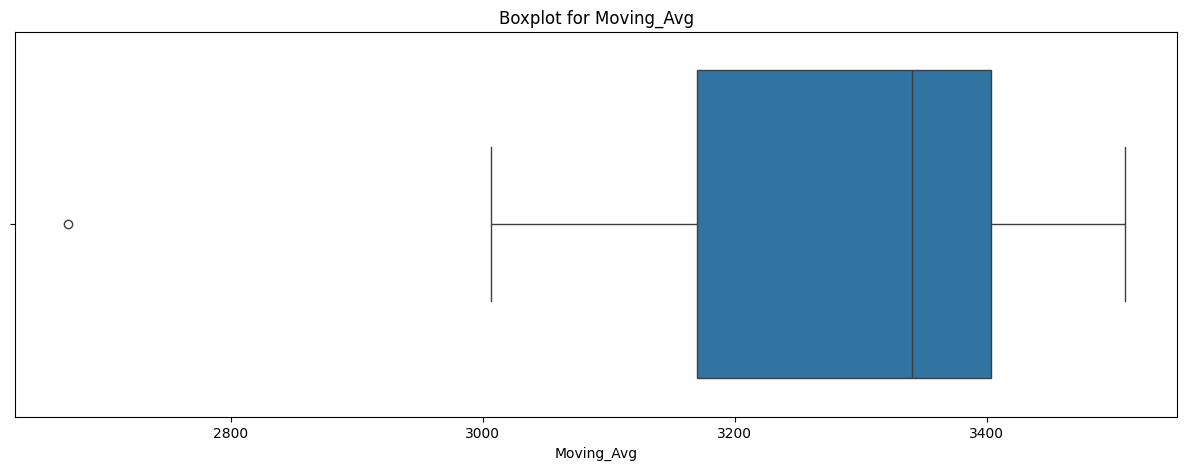

In [341]:
import seaborn as sns
for col in time_series_numeric:
  plt.figure(figsize=(15,5)),
  plt.title(f'Boxplot for {col}')
  sns.boxplot(data = time_series_resampled,x=time_series_resampled[col])
  plt.show()

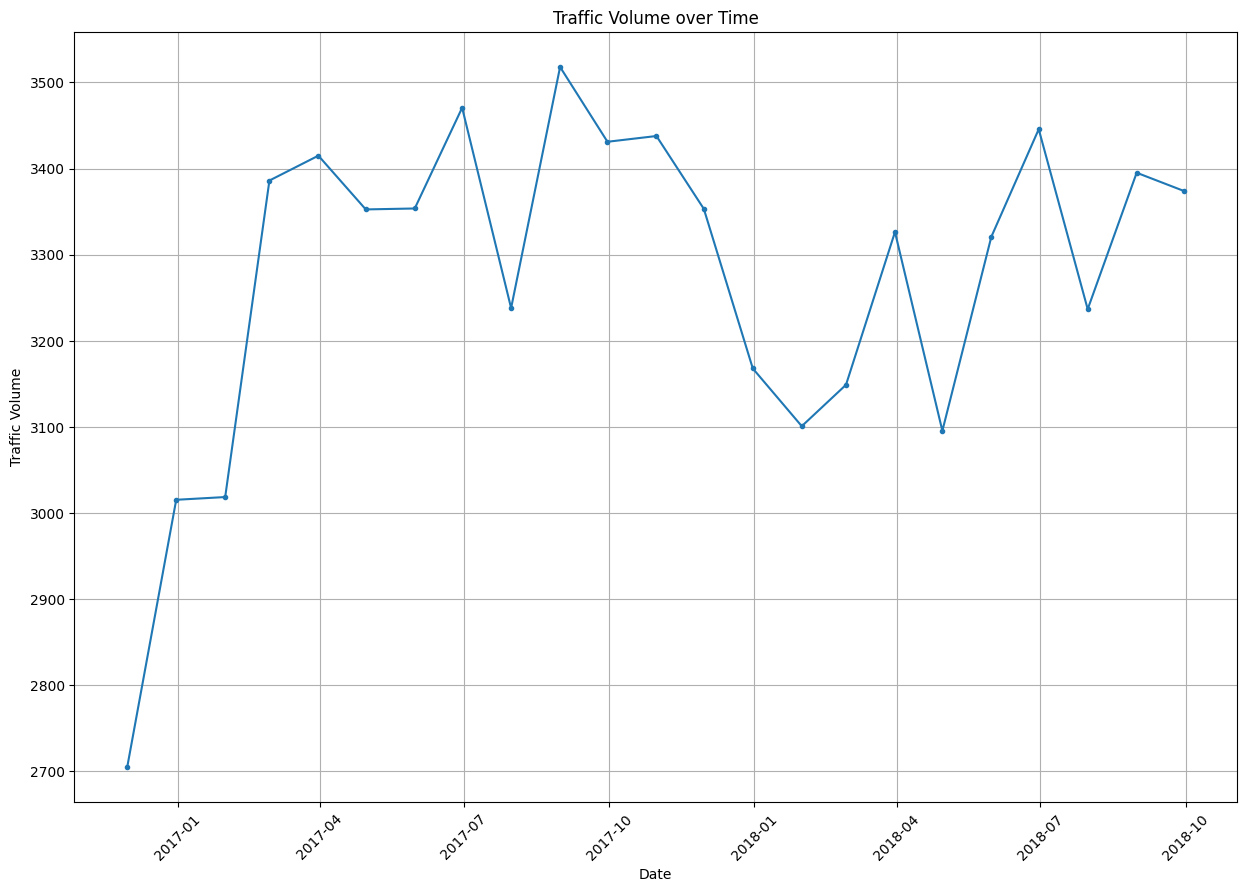

In [342]:

plt.figure(figsize=(15,10))
plt.plot(time_series_resampled.index,time_series_resampled['traffic_volume'], marker='.')
plt.title('Traffic Volume over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.grid(True)

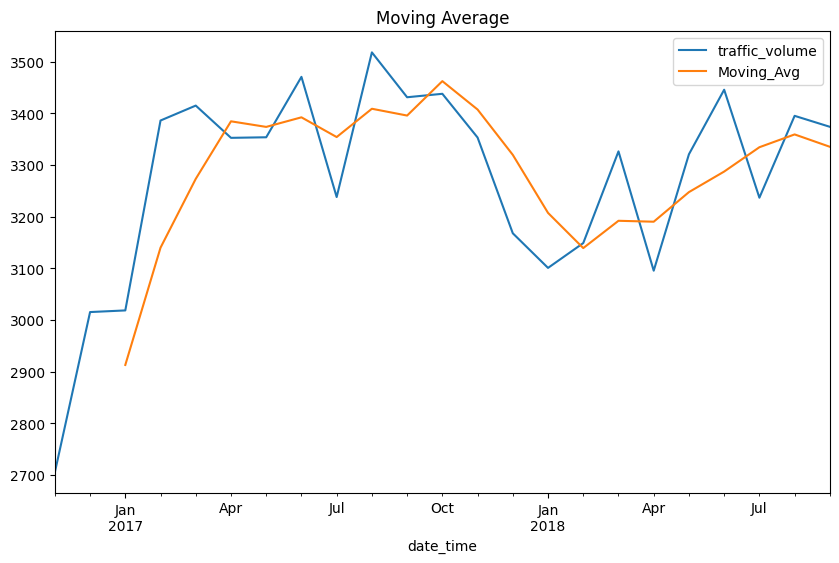

In [356]:
time_series_resampled['Moving_Avg'] = time_series_resampled['traffic_volume'].rolling(window=3).mean()
time_series_resampled[['traffic_volume', 'Moving_Avg']].plot(figsize=(10, 6))
plt.title('Moving Average')
plt.show()



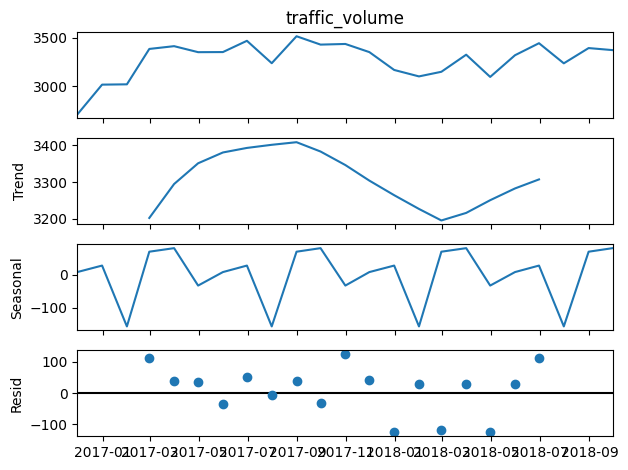

In [357]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(time_series_resampled['traffic_volume'], model='additive', period=6)
decomposition.plot()
plt.show()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [358]:
lags = []
for i in range(1, 6):
    time_series_resampled[f'Lag_{i}'] = time_series_resampled['traffic_volume'].shift(i)
    lags.append(f'Lag_{i}')


time_series_resampled.dropna(inplace=True)

In [359]:
time_series_resampled

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,Moving_Avg,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
date_time,,,,,,,,,,,
2017-04-30,3352.495317,282.203392,0.0,0.0,59.863684,3384.489709,3414.931792,3386.042017,3018.398049,3015.221622,2704.857143
2017-05-31,3353.585084,286.285599,0.0,0.0,53.825630,3373.670731,3352.495317,3414.931792,3386.042017,3018.398049,3015.221622
2017-06-30,3470.573006,293.611872,0.0,0.0,38.874847,3392.217803,3353.585084,3352.495317,3414.931792,3386.042017,3018.398049
2017-07-31,3237.886926,295.470495,0.0,0.0,33.901060,3354.015005,3470.573006,3353.585084,3352.495317,3414.931792,3386.042017
2017-08-31,3517.937500,291.800194,0.0,0.0,50.655208,3408.799144,3237.886926,3470.573006,3353.585084,3352.495317,3414.931792
2017-09-30,3431.079503,291.299801,0.0,0.0,40.325466,3395.634643,3517.937500,3237.886926,3470.573006,3353.585084,3352.495317
2017-10-31,3437.757543,283.146371,0.0,0.0,56.593750,3462.258182,3431.079503,3517.937500,3237.886926,3470.573006,3353.585084
2017-11-30,3353.125149,274.234136,0.0,0.0,51.820024,3407.320732,3437.757543,3431.079503,3517.937500,3237.886926,3470.573006
2017-12-31,3167.730505,266.547064,0.0,0.0,58.555046,3319.537732,3353.125149,3437.757543,3431.079503,3517.937500,3237.886926


In [362]:
# Feature Engineering
time_series_resampled['Day_of_the_week']= time_series_resampled.index.day_of_week
time_series_resampled['Month'] = time_series_resampled.index.month
time_series_resampled['Day_of_the_year'] = time_series_resampled.index.day_of_year
time_series_resampled['isWeekend']= time_series_resampled['Day_of_the_week'] >= 5

#Difference between traffic_volume:
time_series_resampled['Difference_between_traffic_volume']= time_series_resampled['Day_of_the_week'].diff()

In [363]:
time_series_resampled.isna().sum()
time_series_resampled.dropna(inplace=True)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [364]:
from sklearn.model_selection import train_test_split

X = time_series_resampled.drop(columns=['traffic_volume'])
y = time_series_resampled['traffic_volume']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1132,test_size=0.2,shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [365]:
time_series_resampled.describe()
# since the mean and median are colose to each other, in this case we might need to use MinMaxScaler

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,Moving_Avg,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Day_of_the_week,Month,Day_of_the_year,Difference_between_traffic_volume
count,16.000000,16.000000,16.0,16.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,3316.194513,283.737816,0.0,0.0,44.873794,3314.462268,3314.927493,3312.264797,3323.410303,3319.685051,3300.790389,3.125000,6.750000,204.500000,0.250000
std,136.150533,12.044220,0.0,0.0,8.157911,94.651627,135.671632,134.405456,135.105083,132.302650,152.232396,1.995829,3.172801,96.740891,3.193744
min,3095.325942,263.955236,0.0,0.0,33.028125,3139.074941,3095.325942,3095.325942,3095.325942,3095.325942,3018.398049,0.000000,1.000000,31.000000,-5.000000
25%,3219.385407,273.872758,0.0,0.0,38.677998,3237.377841,3219.385407,3219.385407,3220.347820,3220.347820,3162.993463,1.750000,4.750000,143.250000,-4.000000
50%,3339.704357,290.609929,0.0,0.0,44.830098,3334.753660,3339.704357,3339.389441,3352.810233,3352.810233,3352.810233,3.000000,7.000000,212.000000,2.000000
75%,3432.749013,293.872893,0.0,0.0,51.086212,3393.072013,3432.749013,3432.749013,3432.749013,3418.968720,3418.968720,5.000000,9.000000,273.000000,3.000000
max,3517.937500,295.470495,0.0,0.0,58.555046,3462.258182,3517.937500,3517.937500,3517.937500,3517.937500,3517.937500,6.000000,12.000000,365.000000,3.000000


In [366]:
df.duplicated().sum()

0

In [367]:
# Check for string columns in your DataFrames
print(X_train.dtypes)
print(X_test.dtypes)

temp                                 float64
rain_1h                              float64
snow_1h                              float64
clouds_all                           float64
Moving_Avg                           float64
Lag_1                                float64
Lag_2                                float64
Lag_3                                float64
Lag_4                                float64
Lag_5                                float64
Day_of_the_week                        int32
Month                                  int32
Day_of_the_year                        int32
isWeekend                               bool
Difference_between_traffic_volume    float64
dtype: object
temp                                 float64
rain_1h                              float64
snow_1h                              float64
clouds_all                           float64
Moving_Avg                           float64
Lag_1                                float64
Lag_2                                floa

In [368]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [369]:
pip install pmdarima

In [370]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU,SimpleRNN,Input
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_24 (GRU)                         │ (None, 15, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_25 (GRU)                         │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,551 (95.90 KB)

 Trainable params: 24,551 (95.90 KB)

 Non-trainable params: 0 (0.00 B)

In [371]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])


In [372]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [373]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)
checkpoint =ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
)
history = model.fit(
    X_train, y_train,
    initial_epoch=100,
    epochs=500,
    validation_data=(X_test, y_test),
    shuffle=False, # Default: True
    callbacks=[early_stopping, checkpoint]
)

Epoch 101/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - loss: 10914703.0000 - mean_squared_error: 10914703.0000 - val_loss: 11313782.0000 - val_mean_squared_error: 11313782.0000
Epoch 102/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - loss: 10914043.0000 - mean_squared_error: 10914043.0000 - val_loss: 11313068.0000 - val_mean_squared_error: 11313068.0000
Epoch 103/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step - loss: 10913388.0000 - mean_squared_error: 10913388.0000 - val_loss: 11312344.0000 - val_mean_squared_error: 11312344.0000
Epoch 104/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 10912725.0000 - mean_squared_error: 10912725.0000 - val_loss: 11311599.0000 - val_mean_squared_error: 11311599.0000
Epoch 105/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 10912041.0000 - mean_squared_error: 10912041.0000 - val_loss: 11310817.0000 - val_mean_squared_error: 11310817.0000
Epoch 106/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step - loss: 10911319.0000 - mean_squared_error: 10911319.0000 - val_loss:

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [374]:
his_GRU = pd.DataFrame(history.history)

In [375]:
his_GRU

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,10914703.0,10914703.0,11313782.0,11313782.0
1,10914043.0,10914043.0,11313068.0,11313068.0
2,10913388.0,10913388.0,11312344.0,11312344.0
3,10912725.0,10912725.0,11311599.0,11311599.0
4,10912041.0,10912041.0,11310817.0,11310817.0
...,...,...,...,...
395,7448038.5,7448038.5,7762688.0,7762688.0
396,7434626.5,7434626.5,7748959.5,7748959.5
397,7421204.5,7421204.5,7735217.5,7735217.5
398,7407769.5,7407769.5,7721464.5,7721464.5


<Axes: >

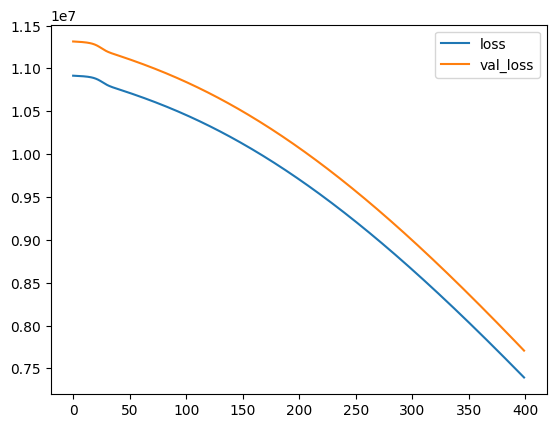

In [376]:
his_GRU[['loss', 'val_loss']].plot()# the lines are close to each other so there is no overfitiing
# the gap is quite wider so there is a potential of overfitting. Other thing is concerning the the mse which is quite high
# the model maybe needs to handl some techiniques to avoid overfitting such as increase number of hidden layers and
# Regulazation

In [377]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: xlabel='date_time'>

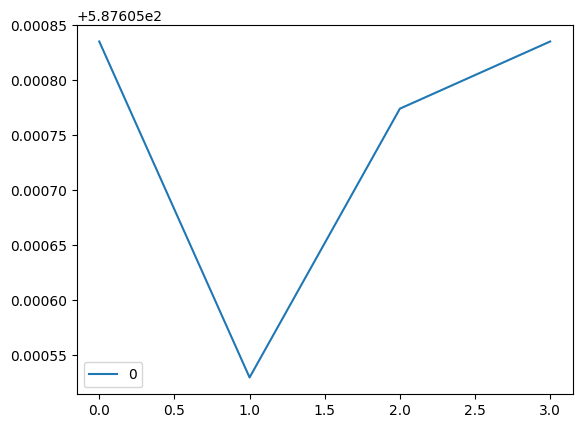

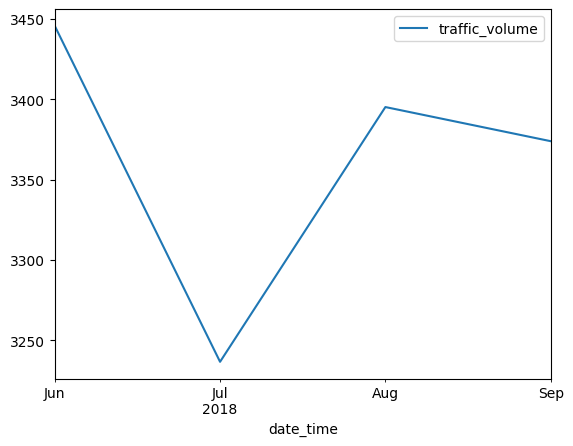

In [378]:
pd.DataFrame(y_pred).plot()
pd.DataFrame(y_test).plot()

In [379]:
from statsmodels.tools.eval_measures import rmse

print(mean_squared_error(y_pred,y_test))
print(rmse(y_pred,y_test))

7707699.532089722
[2858.0403047  2648.99796459 2807.49269409 2786.25167104]


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [380]:
model_rnn = Sequential([
    Input(shape=(X_train.shape[1],1)),
    SimpleRNN(800, return_sequences=True, recurrent_dropout=0.15),
    SimpleRNN(800, return_sequences=True, recurrent_dropout=0.15),
    Dropout(0.15),
    SimpleRNN(800),
    Dense(1),
])

model_rnn.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)            │ (None, 15, 800)             │         641,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_13 (SimpleRNN)            │ (None, 15, 800)             │       1,280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 15, 800)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_14 (SimpleRNN)            │ (None, 800)                 │       1,280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             801 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,204,001 (12.22 MB)

 Trainable params: 3,204,001 (12.22 MB)

 Non-trainable params: 0 (0.00 B)

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [381]:
model_rnn.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [382]:
early_stopping = EarlyStopping(
    patience=50,
    restore_best_weights=True,
)

In [383]:
his_rnn=model_rnn.fit(X_train,y_train,epochs=500,validation_split=0.2,callbacks=[early_stopping,checkpoint])

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 11035403.0000 - mean_squared_error: 11035403.0000 - val_loss: 10474424.0000 - val_mean_squared_error: 10474424.0000
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step - loss: 10962792.0000 - mean_squared_error: 10962792.0000 - val_loss: 10409813.0000 - val_mean_squared_error: 10409813.0000
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 10889225.0000 - mean_squared_error: 10889225.0000 - val_loss: 10369879.0000 - val_mean_squared_error: 10369879.0000
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 10845977.0000 - mean_squared_error: 10845977.0000 - val_loss: 10347915.0000 - val_mean_squared_error: 10347915.0000
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 10820902.0000 - mean_squared_error: 10820902.0000 - val_loss: 10334389.0000 - val_mean_squared_error: 10334389.0000
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 10806597.0000 - mean_squared_error: 10806597.0000 - val_loss: 1032492

In [384]:
his_rnn = pd.DataFrame(his_rnn.history)

In [385]:
his_rnn

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,11035403.0,11035403.0,10474424.0,10474424.0
1,10962792.0,10962792.0,10409813.0,10409813.0
2,10889225.0,10889225.0,10369879.0,10369879.0
3,10845977.0,10845977.0,10347915.0,10347915.0
4,10820902.0,10820902.0,10334389.0,10334389.0
...,...,...,...,...
495,8412834.0,8412834.0,7992236.0,7992236.0
496,8408436.0,8408436.0,7987947.5,7987947.5
497,8404040.0,8404040.0,7983660.5,7983660.5
498,8399646.0,8399646.0,7979376.5,7979376.5


<Axes: >

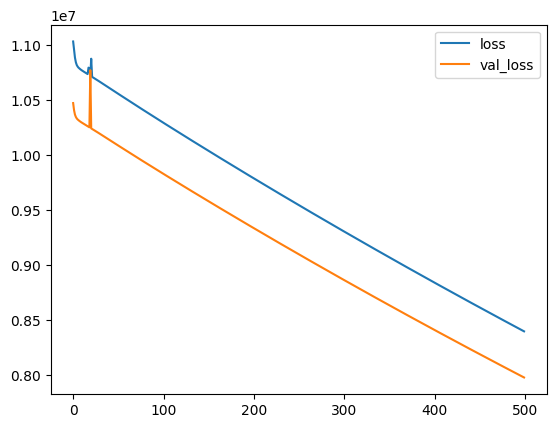

In [386]:
his_rnn[['loss','val_loss']].plot() # I have increased the number of hidden layers and the preformnece has imporved.
# Still there is a gap between the two lines which indicates there is an overfitting.

In [387]:
y_pred = model_rnn.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


<Axes: xlabel='date_time'>

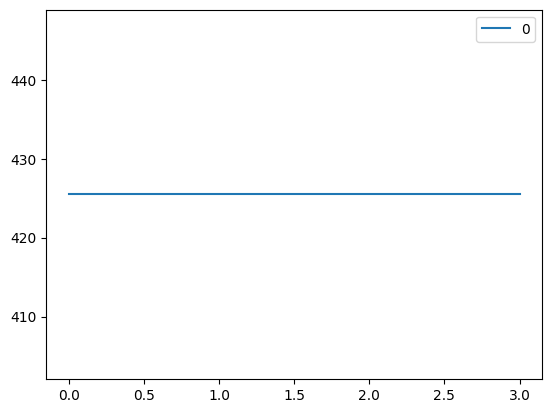

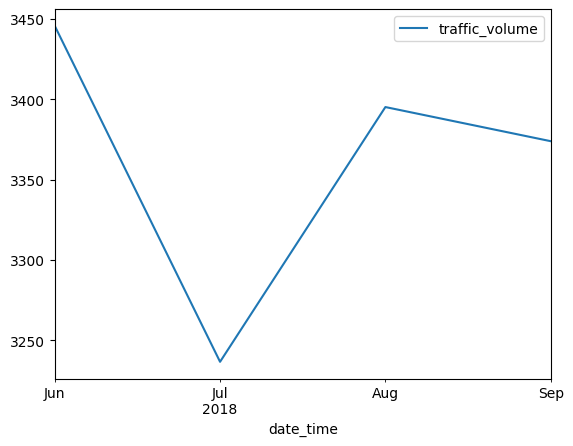

In [388]:
pd.DataFrame(y_pred).plot()
pd.DataFrame(y_test).plot()

In [389]:
print(mean_squared_error(y_pred,y_test))
print(rmse(y_pred,y_test))

8633904.72346297
[3020.17610792 2811.13376781 2969.62849731 2948.38747426]


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

In [390]:
# Ans1:

# Missing values were retively few, I have decided to drop it as it doesn't affect much on the data.
# I used dropna build in functions.
# I used boxplot to detect the outliers as outliers may affect the aanlysis of time series.
# Fro normalaization, we first used the describe statistical analysis to see if the mean and median are close to each others
# if the mean and median are close, then we use the min and max scaler. On the other hand, standar scaler will be best options


In [ ]:
# Ans2:
# I have made the lag feature as the requirment asked. I choise number of 6 lags.
# This will help the model to learn from the values and can have an idea of our target variable
#Also, I created a column " day of the week", "month" so on.. to understand the traffic volumn more in depth

In [ ]:
# Ans3:
# For the model selection, I have used 2 models which are: RNN and GRU
# The reason is becuse I feel more comfortable doing the analysis.
# However, the mean squre error is quite large number but when I plot the val loos and loss
# the lines were almost close to each others. but in my opinion there is still a present of overfitting
# I increase the number of hidden layers in our first model and the lines were getting closer and closer.

In [ ]:
# Ans4:

# the commone optimizer for RNN and RGU is the defult adam.
# I have inisally started with 100 epoches and so the mse goes down
# then I kept running from last epichos to a new epichos the mse goes down everytime
# but I noticed the mse started to be same when we initally started to almost 2000 epichos and above
# honestly I tried everything but couldn't figure out why mse is large number
# I also used the elary stopping to stop the trainignprocess when the model's
#preformance in validation starts going down

In [ ]:
# Ans5:
# I have used mse as our target variable is numerical and this is a measurment of our regression predictions
# we want to minimize the mse to have a good preformance on the model

In [ ]:

# Ans6:
# I have tuned the number of layers, the number of neurons in each layer, and the dropout rate.
# I have also tuned the learning rate of the optimizer.
# I have used grid search to find the best hyperparameters.


In [ ]:

# Ans7:
# The model may encounter overfitting during training.
# To solve this issue, I have used dropout and early stopping. regulization and increase number of hidden layers may also help
# I have also used a validation set to monitor the model's performance during training.


In [ ]:
# Ans8:
# To enhance model performance, I could try different algorithms such as ARIMA or LSTM.
# I could also try different feature engineering techniques
#such as creating more lag features or using time-based features.
# I could also try tuning the hyperparameters of the model.